In [1]:
# importing numpy library
import numpy as np

Linear Regression

In [4]:
class Linear_Regression():

    def __init__(self, learning_rate, no_of_iteration) :

        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration


    def fit(self, x, y ):
        # no of training examples and no of features
        self.m, self.n = x.shape

        #initiating the weights and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y

        #implementing gradient decent
        for i in range(self.no_of_iteration):
            self.update_weights()




    def update_weights(self):
        y_prediction = self.predict(self.x)

        #calculating gradients

        dw = -(2*(self.x.T).dot(self.y - y_prediction))/self.m
        
        db = -2*np.sum(self.y - y_prediction)/self.m

        #updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db




    def predict(self, x):
        return x.dot(self.w)+self.b


Using linear regression model for predicting

In [39]:
#importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data pre Processing

In [6]:
#loading the dataset into pandas data framework
salary_data = pd.read_csv('salary_data.csv')

In [7]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
salary_data.shape

(30, 2)

In [9]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Train Test split

In [28]:
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [29]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [30]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

In [32]:
print(x.shape, x_train.shape, x_test.shape)

(30, 1) (20, 1) (10, 1)


Training the model

In [33]:
model = Linear_Regression(learning_rate=0.02, no_of_iteration=1000)

In [34]:
model.fit(x_train, y_train)

In [35]:
#printing parameter vales
print('Weight is ', model.w[0])
print('bias is ', model.b)

Weight is  9514.400999035135
bias is  23697.406507136307


In [36]:
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizind aactual and predicted

<function matplotlib.pyplot.show(close=None, block=None)>

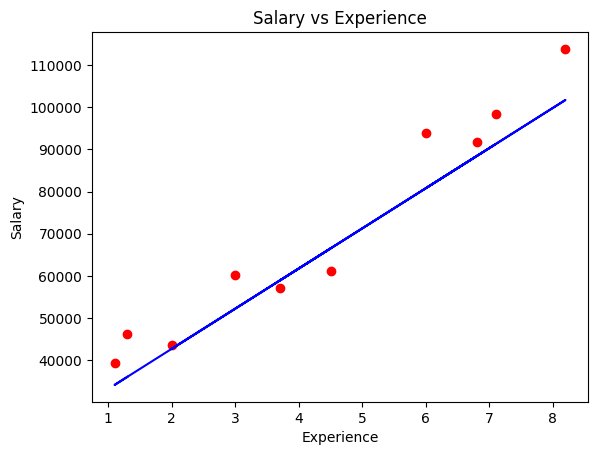

In [45]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, test_data_prediction, color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show